<a href="https://colab.research.google.com/github/ayushpandeyap975/FakeJobPosting_AI_MSE/blob/main/COVID_19_Case_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# 1. Load the data, skipping the first two rows and using the first row as header
df = pd.read_csv('CONVENIENT_global_confirmed_cases.csv')

# 2. View the structure
print(df.head())

   Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
0  Province/State          NaN      NaN      NaN      NaN     NaN         NaN   
1         1/23/20          0.0      0.0      0.0      0.0     0.0         0.0   
2         1/24/20          0.0      0.0      0.0      0.0     0.0         0.0   
3         1/25/20          0.0      0.0      0.0      0.0     0.0         0.0   
4         1/26/20          0.0      0.0      0.0      0.0     0.0         0.0   

   Antigua and Barbuda  Argentina  Armenia  ... Uruguay Uzbekistan Vanuatu  \
0                  NaN        NaN      NaN  ...     NaN        NaN     NaN   
1                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
2                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
3                  0.0        0.0      0.0  ...     0.0        0.0     0.0   
4                  0.0        0.0      0.0  ...     0.0        0.0     0.0   

  Venezuela Vietnam West Bank and Gaza Winte

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# 1. Load the data, skipping the first two rows and using the first row as header
df = pd.read_csv('cleaned_confirmed_cases.csv')

# 2. View the structure
print(df.head())

         Date      Country  ConfirmedCases
0  2020-01-23  Afghanistan             0.0
1  2020-01-24  Afghanistan             0.0
2  2020-01-25  Afghanistan             0.0
3  2020-01-26  Afghanistan             0.0
4  2020-01-27  Afghanistan             0.0


✅ Model trained successfully!
📉 Root Mean Squared Error (RMSE): 7954.74

🔍 Now let's predict COVID-19 cases based on your input.
Enter country name (e.g., India): Pakistan
Enter date (YYYY-MM-DD): 2025-06-12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



📅 Predicted confirmed COVID-19 cases in *Pakistan* on *2025-06-12*: 82


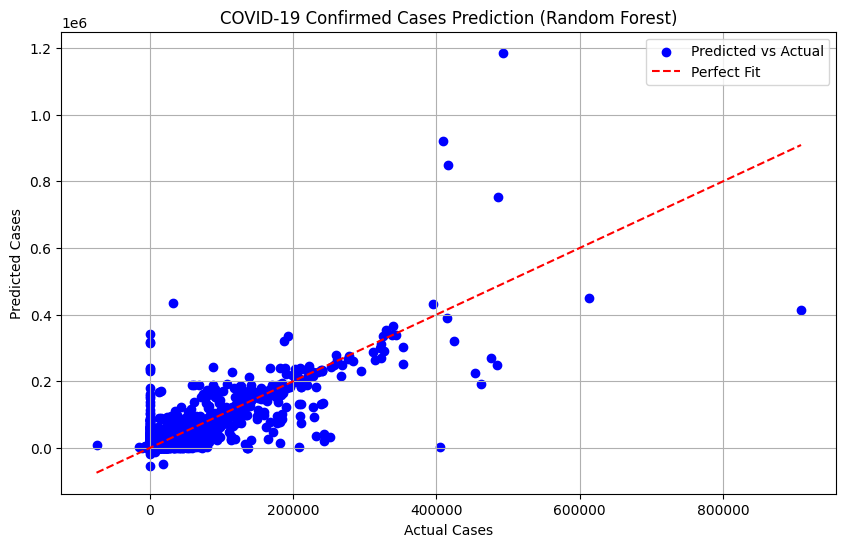

In [51]:
# Step 1: Install necessary libraries
#!pip install pandas scikit-learn matplotlib

# Step 2: Import required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Step 3: Upload the dataset just once
#from google.colab import files
#uploaded = files.upload()  # Upload 'cleaned_confirmed_cases.csv'
#file_path = list(uploaded.keys())[0]  # Automatically gets uploaded file name

# Step 4: Load and preprocess the dataset
df = pd.read_csv('/content/cleaned_confirmed_cases.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Encode country names
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])

# Define features and target
X = df[['CountryEncoded', 'Day', 'Month', 'Year']]
y = df['ConfirmedCases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("✅ Model trained successfully!")
print("📉 Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

# Step 5: Ask user for input to predict new cases
print("\n🔍 Now let's predict COVID-19 cases based on your input.")
user_country = input("Enter country name (e.g., India): ")
user_date = input("Enter date (YYYY-MM-DD): ")

# Step 6: Make prediction
try:
    date_obj = pd.to_datetime(user_date)
    encoded_country = le.transform([user_country])[0]
    input_features = [[encoded_country, date_obj.day, date_obj.month, date_obj.year]]
    prediction = model.predict(input_features)[0]
    print(f"\n📅 Predicted confirmed COVID-19 cases in *{user_country}* on *{user_date}*: {int(prediction)}")
except Exception as e:
    print("\n❌ Error:", e)
    print("Make sure the country name is spelled exactly as in the dataset and the date is in YYYY-MM-DD format.")

# Step 7: Plot the Actual vs Predicted Cases
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label="Perfect Fit")
plt.xlabel("Actual Cases")
plt.ylabel("Predicted Cases")
plt.title("COVID-19 Confirmed Cases Prediction (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()